<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Prof. Tatiana Escovedo
## Aula 03: Recursos Avançados Aplicados ao Aprendizado Supervisionado

### Prática 4

## Configuração do ambiente

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy
import scipy.sparse
import scipy.sparse.linalg
#importando pre processamento referente a padronização e normalização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#importando selecao do modelo e preparacao  da base
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#importando métrica de acuracia
from sklearn.metrics import accuracy_score
#importando Pipeline
from sklearn.pipeline import Pipeline
#importando os modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

O dataset contém informações sobre vários pacientes, com cada registro representando uma pessoa. As variáveis incluem características médicas, medidas de saúde e a presença ou ausência de diabetes. A última coluna, Outcome, indica se a paciente tem diabetes (1) ou não (0).

Descrição de Cada Coluna
- Pregnancies: Número de vezes que a paciente esteve grávida.
- Glucose: Nível de glicose no sangue em jejum (mg/dL).
- BloodPressure: Pressão arterial diastólica (mm Hg).
- SkinThickness: Espessura da dobra cutânea do tríceps (mm).
- Insulin: Nível de insulina no soro em duas horas (mu U/mL).
- BMI: Índice de Massa Corporal (peso em kg/(altura em m)^2).
- DiabetesPedigreeFunction: Função de pedigree de diabetes (mede a probabilidade de diabetes com base no histórico familiar).
- Age: Idade da paciente (anos).
- Outcome: Resultado (0 ou 1) indicando a ausência (0) ou presença (1) de diabetes.

O objetivo é prever se um paciente tem diabetes ou não baseado em suas características médicas.

In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RonaldoCostaRJ/AtaqueCardiaco/main/heart.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [5]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.636333 (0.084741)
CART: 0.793333 (0.078436)
NB: 0.826000 (0.100519)
SVM: 0.636167 (0.078881)


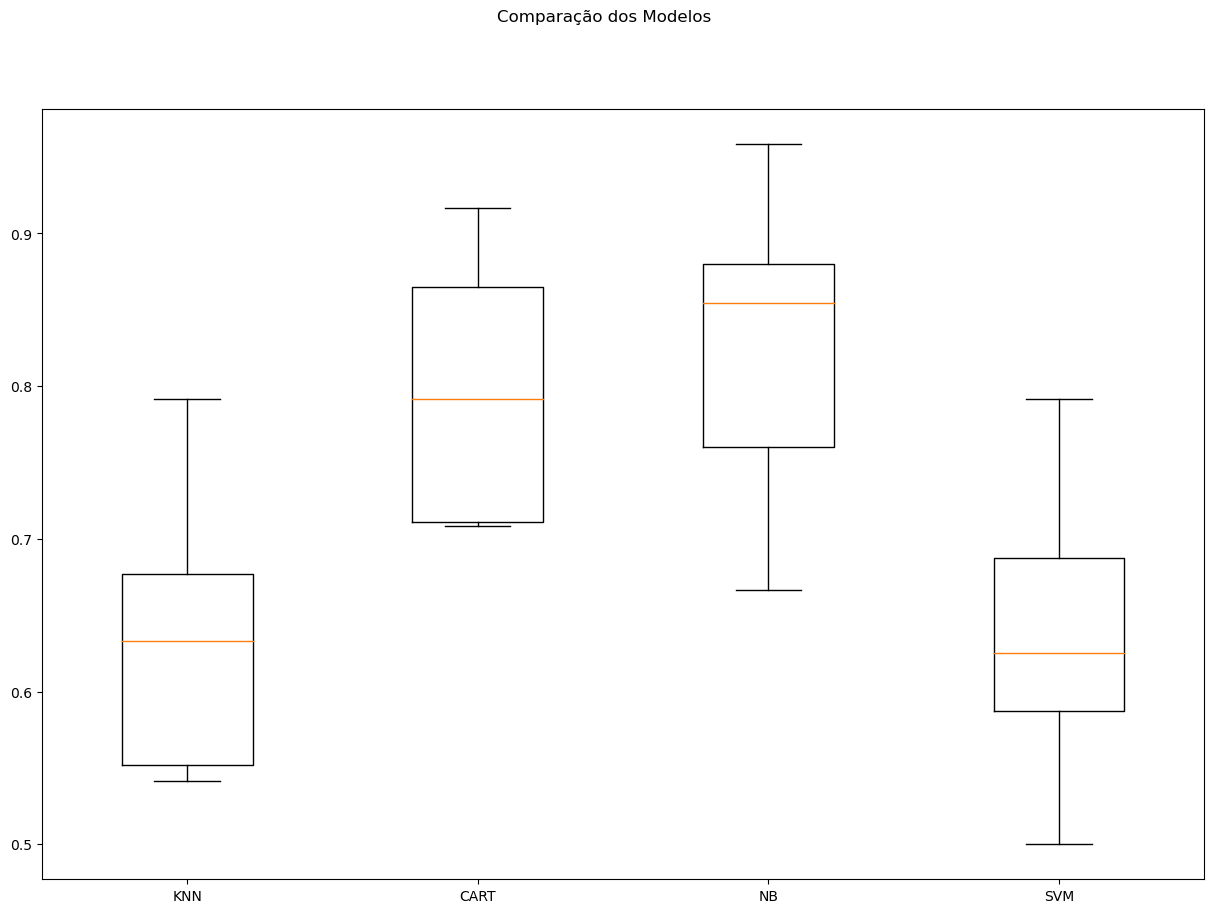

In [7]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = DecisionTreeClassifier()
bases.append(('cart', model1))
model2 = SVC()
bases.append(('svm', model2))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$


onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset de diabetes através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

KNN-orig: 0.636 (0.085)
CART-orig: 0.793 (0.078)
NB-orig: 0.826 (0.101)
SVM-orig: 0.636 (0.079)
KNN-padr: 0.810 (0.073)
CART-padr: 0.822 (0.081)
NB-padr: 0.826 (0.101)
SVM-padr: 0.825 (0.093)
KNN-norm: 0.830 (0.072)
CART-norm: 0.809 (0.082)
NB-norm: 0.826 (0.101)
SVM-norm: 0.846 (0.088)


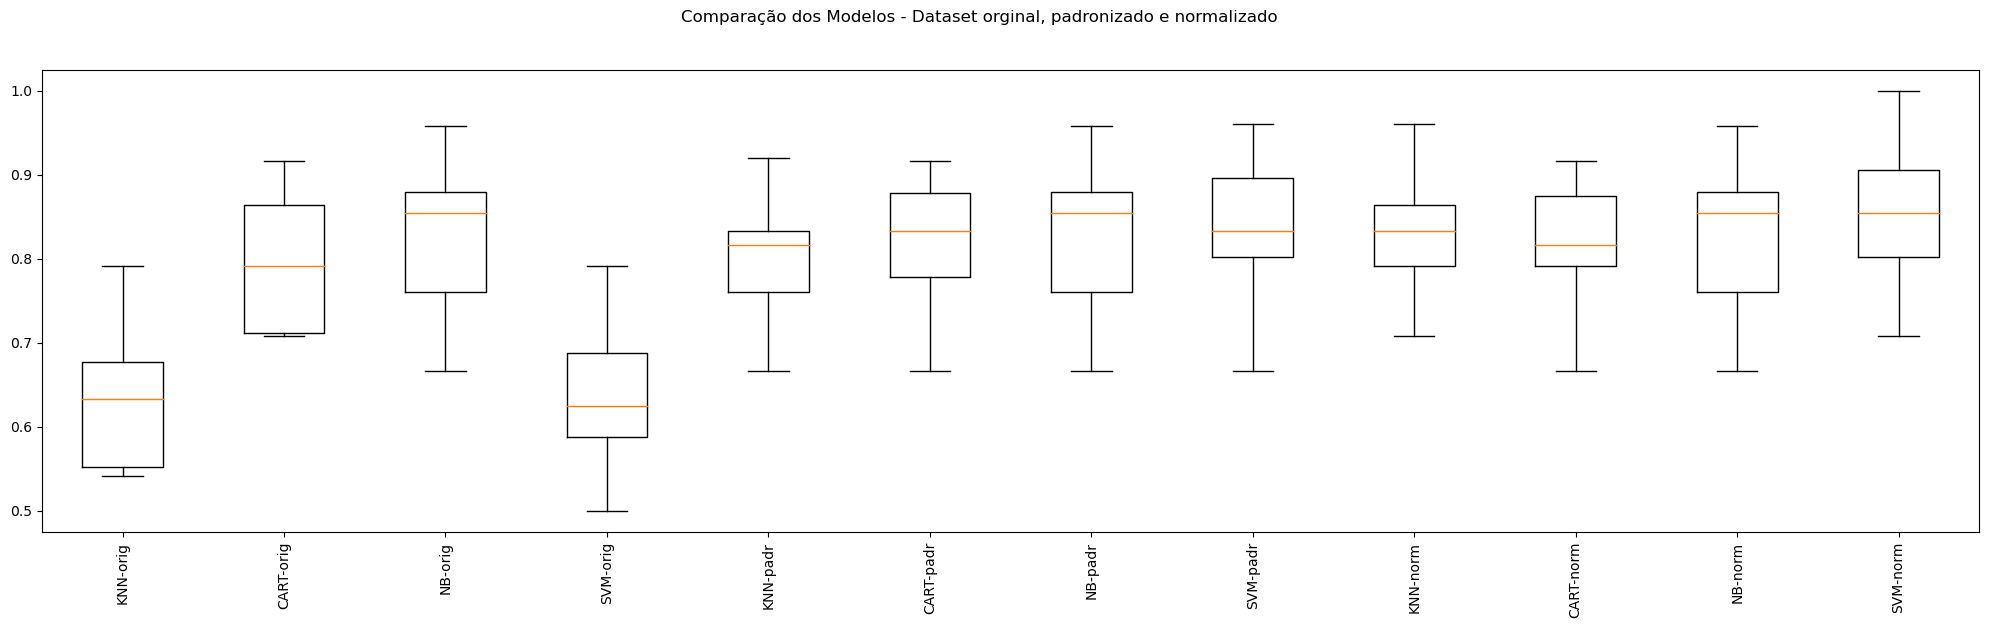

In [8]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados

knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [9]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = DecisionTreeClassifier()
bases.append(('cart', model1))
model2 = SVC()
bases.append(('svm', model2))
# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {

    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

#Demorou 1m 45.8s


Modelo: KNN-orig - Melhor: 0.694133 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Modelo: KNN-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: KNN-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: CART-orig - Melhor: 0.822279 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: CART-padr - Melhor: 0.818197 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.817942 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
Modelo: NB-padr - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
Modelo: NB-norm - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
Modelo: SVM-orig - Melhor: 0.834949 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Modelo: SVM-padr - 

In [ ]:
#Modelo: KNN-orig - Melhor: 0.694133 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
#Modelo: KNN-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
#Modelo: KNN-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
#################################################################################################################################
#Modelo: CART-orig - Melhor: 0.822279 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
#Modelo: CART-padr - Melhor: 0.818197 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
#Modelo: CART-norm - Melhor: 0.817942 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
#################################################################################################################################
#Modelo: NB-orig - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
#Modelo: NB-padr - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
#Modelo: NB-norm - Melhor: 0.822449 usando {'NB__var_smoothing': 1e-09}
#################################################################################################################################
#Modelo: SVM-orig - Melhor: 0.834949 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
#Modelo: SVM-padr - Melhor: 0.834779 usando {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
#Modelo: SVM-norm - Melhor: 0.851276 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
#################################################################################################################################
## MELHOR MODELO: 
##Modelo: KNN-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
#################################################################################################################################

In [10]:
#### Tuning do KNN ####################################

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
####################################
#Saída:
#Sem tratamento de missings: knn-orig - Melhor: 0.694133 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
#Sem tratamento de missings: knn-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7} (---MELHOR-- )
#Sem tratamento de missings: knn-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}



Sem tratamento de missings: knn-orig - Melhor: 0.694133 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-norm - Melhor: 0.843027 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}


## Finalização do Modelo

Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [11]:
np.random.seed(7)
# Avaliação do modelo com o conjunto de testes
# Melhor modelo #### knn-padr - Melhor: 0.855272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}

# Preparação do modelo
scaler = StandardScaler().fit(X_train) #Ajuste do scaler com conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=7)
model.fit(rescaledX, y_train)
# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7868852459016393


In [12]:
scaler = StandardScaler().fit(X) #Ajuste do scaler com conjunto de treino
rescaledX = scaler.transform(X)
model.fit(rescaledX, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

## Salvando os arquivos

In [13]:
# Salvando o modelo
model_filename = 'knn_heart_attack_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'standardscaler_heart_attack.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'knn_heart_attack.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_heartattack.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_heartattack.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [18]:
# Novos dados - não sabemos a classe!

data = {'age':  [53, 48, 52],
        'sex': [1, 1, 1],
        'cp': [2, 2, 3],
        'trtbps': [130, 130, 145],
        'chol': [350, 250, 233],
        'fbs': [1, 0, 1],
        'restecg': [0, 0, 1],
        'thalachh': [185, 178, 150],	
	'exng': [3.5, 2.3, 1],
        'oldpeak': [2, 0,3.5],
        'slp': [0, 0, 1],
        'caa': [2, 1, 2],
        'thall': [1, 1, 2],
	}
atributos = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:13].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.15069166  0.68100522  1.00257707 -0.09273778  2.00474772  2.394438
  -1.00583187  1.54601046  6.7657603   0.82852939 -2.27457861  1.24459328
  -2.14887271]
 [-0.7021358   0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
  -1.00583187  1.23989692  4.2072263  -0.89686172 -2.27457861  0.26508221
  -2.14887271]
 [-0.26098049  0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
   0.89896224  0.01544279  1.43548113  2.12257273 -0.64911323  1.24459328
  -0.51292188]]


In [19]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 0.]
